# 3장. 기초를 넘어서: 이미지에서 특징 감지하기

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/aiml4coders/blob/main/ch03/03-beyond-the-basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

## 합성곱 신경망 만들기

In [ ]:
import tensorflow as tf

In [ ]:
data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', 
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(training_images, training_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 17s 3ms/step - loss: 0.4479 - accuracy: 0.8375
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2950 - accuracy: 0.8908
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2501 - accuracy: 0.9067
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2178 - accuracy: 0.9187
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1925 - accuracy: 0.9287
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1707 - accuracy: 0.9364
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1481 - accuracy: 0.9438
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1323 - accuracy: 0.9499
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1158 - accuracy: 0.9565
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.10

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.9373 - accuracy: 0.9108


[0.9373274445533752, 0.9107999801635742]

In [ ]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 1s 2ms/step
[1.0593565e-25 4.5061554e-36 4.5964984e-31 6.9855330e-35 4.2500467e-30
 2.7152591e-20 1.8340670e-32 2.8903417e-15 1.2565073e-31 1.0000000e+00]
9


## 합성곱 신경망 살펴 보기

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## 말과 사람을 구별하는 CNN 만들기

### 케라스 ImageDataGenerator

In [ ]:
import urllib.request
import zipfile

url = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 전체 이미지를 1./255로 스케일을 조정합니다.
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


### 말-사람 데이터셋을 위한 CNN 구조

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 35, 35, 64)      

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
model.fit(train_generator, epochs=15)

Epoch 1/15
33/33 [==============================] - 8s 200ms/step - loss: 0.6131 - accuracy: 0.6962
Epoch 2/15
33/33 [==============================] - 7s 203ms/step - loss: 0.2485 - accuracy: 0.9065
Epoch 3/15
33/33 [==============================] - 7s 203ms/step - loss: 0.2959 - accuracy: 0.9416
Epoch 4/15
33/33 [==============================] - 7s 206ms/step - loss: 0.1092 - accuracy: 0.9620
Epoch 5/15
33/33 [==============================] - 7s 203ms/step - loss: 0.0854 - accuracy: 0.9649
Epoch 6/15
33/33 [==============================] - 7s 201ms/step - loss: 0.0485 - accuracy: 0.9815
Epoch 7/15
33/33 [==============================] - 7s 202ms/step - loss: 0.1632 - accuracy: 0.9815
Epoch 8/15
33/33 [==============================] - 7s 205ms/step - loss: 0.0178 - accuracy: 0.9951
Epoch 9/15
33/33 [==============================] - 7s 201ms/step - loss: 0.1561 - accuracy: 0.9786
Epoch 10/15
33/33 [==============================] - 7s 203ms/step - loss: 0.0164 - accuracy: 0.9942

#### `image_dataset_from_directory` 사용하기

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    image_size=(300, 300),
    label_mode='binary'
)

Found 1027 files belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs=15)

Epoch 1/15
33/33 [==============================] - 6s 114ms/step - loss: 0.6009 - accuracy: 0.6631
Epoch 2/15
33/33 [==============================] - 5s 112ms/step - loss: 0.3060 - accuracy: 0.8870
Epoch 3/15
33/33 [==============================] - 5s 112ms/step - loss: 0.2603 - accuracy: 0.9172
Epoch 4/15
33/33 [==============================] - 5s 112ms/step - loss: 0.0956 - accuracy: 0.9640
Epoch 5/15
33/33 [==============================] - 5s 113ms/step - loss: 0.1749 - accuracy: 0.9611
Epoch 6/15
33/33 [==============================] - 5s 112ms/step - loss: 0.0782 - accuracy: 0.9747
Epoch 7/15
33/33 [==============================] - 5s 113ms/step - loss: 0.1548 - accuracy: 0.9718
Epoch 8/15
33/33 [==============================] - 5s 112ms/step - loss: 0.0721 - accuracy: 0.9873
Epoch 9/15
33/33 [==============================] - 5s 112ms/step - loss: 0.2042 - accuracy: 0.9649
Epoch 10/15
33/33 [==============================] - 5s 113ms/step - loss: 0.0037 - accuracy: 1.0000

### 검증 세트 추가하기

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
validation_url = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"

validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [ ]:
model.fit(train_generator,
          epochs=15,
          validation_data=validation_generator)

Epoch 1/15
33/33 [==============================] - 9s 246ms/step - loss: 0.5793 - accuracy: 0.7478 - val_loss: 0.7911 - val_accuracy: 0.8750
Epoch 2/15
33/33 [==============================] - 8s 235ms/step - loss: 0.2856 - accuracy: 0.9124 - val_loss: 1.3969 - val_accuracy: 0.8203
Epoch 3/15
33/33 [==============================] - 8s 256ms/step - loss: 0.2110 - accuracy: 0.9426 - val_loss: 1.8025 - val_accuracy: 0.8125
Epoch 4/15
33/33 [==============================] - 8s 239ms/step - loss: 0.0271 - accuracy: 0.9912 - val_loss: 4.1407 - val_accuracy: 0.7695
Epoch 5/15
33/33 [==============================] - 9s 282ms/step - loss: 0.1480 - accuracy: 0.9688 - val_loss: 1.9486 - val_accuracy: 0.8516
Epoch 6/15
33/33 [==============================] - 8s 237ms/step - loss: 0.1070 - accuracy: 0.9698 - val_loss: 1.6390 - val_accuracy: 0.8359
Epoch 7/15
33/33 [==============================] - 8s 237ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 3.1655 - val_accuracy: 0.8242
Epoch 

### 모델 실행하기

코랩을 사용하는 경우 아래 셀에서 직접 이미지를 업로드할 수 있습니다.

In [ ]:
import sys

# 코랩을 사용중인지 확인합니다.
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()
    sample_images = ['/content/' + fn for fn in uploaded.keys()]

    # 업로드된 파일이 없으면 깃허브에서 다운로드합니다.
    if len(uploaded) < 1:
        import gdown
        base_url = 'https://github.com/rickiepark/aiml4coders/raw/main/ch03/'
        for i in range(1,4):
            gdown.download(base_url + 'hh_image_{}.jpg'.format(i))
        sample_images = ['/content/hh_image_{}.jpg'.format(i) for i in range(1,4)]

# 로컬 컴퓨터면 ch03 폴더에 있는 이미지를 사용합니다.
else:
    sample_images = ['hh_image_{}.jpg'.format(i) for i in range(1,4)]

Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/hh_image_1.jpg
To: /content/hh_image_1.jpg
100%|██████████| 97.4k/97.4k [00:00<00:00, 50.9MB/s]
Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/hh_image_2.jpg
To: /content/hh_image_2.jpg
100%|██████████| 260k/260k [00:00<00:00, 33.9MB/s]
Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/hh_image_3.jpg
To: /content/hh_image_3.jpg
100%|██████████| 61.4k/61.4k [00:00<00:00, 72.1MB/s]


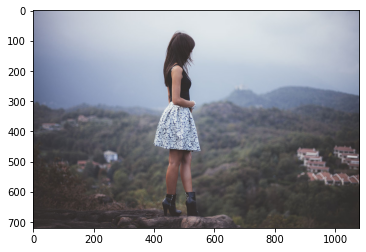

1/1 [==============================] - 0s 225ms/step
모델 출력: 1.0
/content/hh_image_1.jpg는 사람입니다.
--------------------


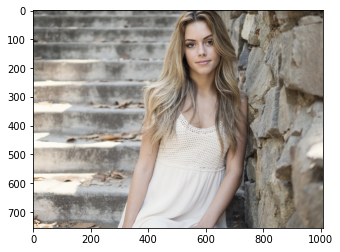

1/1 [==============================] - 0s 22ms/step
모델 출력: 0.0
/content/hh_image_2.jpg는 말입니다.
--------------------


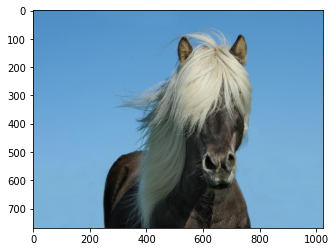

1/1 [==============================] - 0s 17ms/step
모델 출력: 1.0
/content/hh_image_3.jpg는 사람입니다.
--------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

for fn in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = tf.keras.utils.load_img(fn, target_size=(300, 300))
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    print('모델 출력:', classes[0][0])
    if classes[0][0] > 0.5:
        print(fn + "는 사람입니다.")
    else:
        print(fn + "는 말입니다.")
    print('--------------------')

## 이미지 증식

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [ ]:
model.fit(train_generator,
          epochs=15,
          validation_data=validation_generator)

Epoch 1/15
33/33 [==============================] - 28s 807ms/step - loss: 0.7532 - accuracy: 0.5424 - val_loss: 0.6424 - val_accuracy: 0.5625
Epoch 2/15
33/33 [==============================] - 23s 704ms/step - loss: 0.6637 - accuracy: 0.6767 - val_loss: 0.9027 - val_accuracy: 0.5000
Epoch 3/15
33/33 [==============================] - 24s 733ms/step - loss: 0.5445 - accuracy: 0.7352 - val_loss: 0.4345 - val_accuracy: 0.8281
Epoch 4/15
33/33 [==============================] - 24s 760ms/step - loss: 0.5312 - accuracy: 0.7624 - val_loss: 1.1617 - val_accuracy: 0.5859
Epoch 5/15
33/33 [==============================] - 23s 707ms/step - loss: 0.4285 - accuracy: 0.8335 - val_loss: 3.1123 - val_accuracy: 0.5586
Epoch 6/15
33/33 [==============================] - 25s 766ms/step - loss: 0.3785 - accuracy: 0.8539 - val_loss: 1.5645 - val_accuracy: 0.6758
Epoch 7/15
33/33 [==============================] - 23s 707ms/step - loss: 0.3051 - accuracy: 0.8754 - val_loss: 0.5015 - val_accuracy: 0.7930

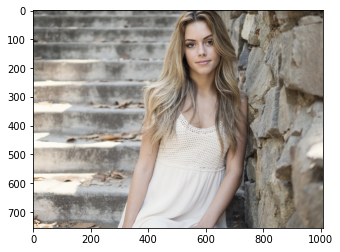

1/1 [==============================] - 0s 78ms/step
모델 출력: 1.0
/content/hh_image_2.jpg는 사람입니다.


In [ ]:
fn = sample_images[1]
plt.imshow(mpimg.imread(fn))
plt.show()

# 이미지 불러오기
img = tf.keras.utils.load_img(fn, target_size=(300, 300))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model.predict(x)

print('모델 출력:', classes[0][0])
if classes[0][0] > 0.5:
    print(fn + "는 사람입니다.")
else:
    print(fn + "는 말입니다.")

#### `image_dataset_from_directory` 사용하기

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    image_size=(300, 300),
    label_mode='binary'
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(300, 300),
    label_mode='binary'
)

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(300, 300, 3)),
    tf.keras.layers.RandomRotation(0.11, fill_mode='nearest'),
    tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode='nearest'),
    tf.keras.layers.RandomZoom(0.2, fill_mode='nearest'),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

model.fit(train_ds,
          epochs=15,
          validation_data=validation_ds)

Epoch 1/15


33/33 [==============================] - 12s 260ms/step - loss: 0.7206 - accuracy: 0.5979 - val_loss: 1.1115 - val_accuracy: 0.5000
Epoch 2/15
33/33 [==============================] - 10s 265ms/step - loss: 0.6670 - accuracy: 0.7186 - val_loss: 0.4866 - val_accuracy: 0.7070
Epoch 3/15
33/33 [==============================] - 9s 256ms/step - loss: 0.5330 - accuracy: 0.7439 - val_loss: 3.3148 - val_accuracy: 0.5352
Epoch 4/15
33/33 [==============================] - 9s 257ms/step - loss: 0.5517 - accuracy: 0.7683 - val_loss: 1.2169 - val_accuracy: 0.5469
Epoch 5/15
33/33 [==============================] - 9s 257ms/step - loss: 0.4048 - accuracy: 0.8033 - val_loss: 1.9027 - val_accuracy: 0.6836
Epoch 6/15
33/33 [==============================] - 9s 258ms/step - loss: 0.3444 - accuracy: 0.8647 - val_loss: 4.2177 - val_accuracy: 0.5430
Epoch 7/15
33/33 [==============================] - 9s 255ms/step - loss: 0.3449 - accuracy: 0.8734 - val_loss: 1.3812 - val_accuracy: 0.7500
Epoch 8/15
33/3

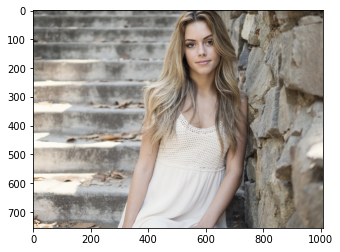

1/1 [==============================] - 0s 81ms/step
모델 출력: 0.84795827
/content/hh_image_2.jpg는 사람입니다.


In [ ]:
fn = sample_images[1]
plt.imshow(mpimg.imread(fn))
plt.show()

# 이미지 불러오기
img = tf.keras.utils.load_img(fn, target_size=(300, 300))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model.predict(x)

print('모델 출력:', classes[0][0])
if classes[0][0] > 0.5:
    print(fn + "는 사람입니다.")
else:
    print(fn + "는 말입니다.")

## 전이 학습

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)
pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)
pre_trained_model.load_weights(weights_file)

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_27 (Conv2D)             (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_27[0][0]']              
 alization)                                                                                       
                                                                                       

In [ ]:
for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('마지막 층의 출력 크기: ', last_layer.output_shape)
last_output = last_layer.output

마지막 층의 출력 크기:  (None, 7, 7, 768)


In [ ]:
# 출력을 펼쳐서 1차원으로 만듭니다.
x = layers.Flatten()(last_output)
# 1,204개 은닉 유닛과 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
x = layers.Dense(1024, activation='relu')(x)
# 분류를 위해 시그모이드 함수를 사용하는 최종 층을 추가합니다.
x = layers.Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
train_generator = train_datagen.flow_from_directory(
    training_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
model.fit(train_generator,
          epochs=40,
          validation_data=validation_generator)

Epoch 1/40
52/52 [==============================] - 17s 247ms/step - loss: 0.1889 - acc: 0.9455 - val_loss: 0.0914 - val_acc: 0.9688
Epoch 2/40
52/52 [==============================] - 11s 218ms/step - loss: 0.0520 - acc: 0.9776 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 3/40
52/52 [==============================] - 11s 217ms/step - loss: 0.0297 - acc: 0.9903 - val_loss: 0.0099 - val_acc: 0.9961
Epoch 4/40
52/52 [==============================] - 11s 220ms/step - loss: 0.0151 - acc: 0.9961 - val_loss: 1.0429e-04 - val_acc: 1.0000
Epoch 5/40
52/52 [==============================] - 11s 219ms/step - loss: 0.0060 - acc: 0.9990 - val_loss: 0.0065 - val_acc: 0.9961
Epoch 6/40
52/52 [==============================] - 11s 219ms/step - loss: 0.0284 - acc: 0.9912 - val_loss: 0.0064 - val_acc: 0.9961
Epoch 7/40
52/52 [==============================] - 12s 239ms/step - loss: 0.0054 - acc: 0.9981 - val_loss: 0.0437 - val_acc: 0.9883
Epoch 8/40
52/52 [==============================] - 11s 219ms/ste

dogs-vs-cats 데이터셋을 사용한 예제는 원서 깃허브에 있는 [transfer_learning-cats-dogs.ipynb](https://github.com/lmoroney/tfbook/blob/master/chapter3/transfer_learning-cats-dogs.ipynb) 노트북을 참고하세요.

## 다중 분류

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O ./rps.zip

--2023-01-04 05:42:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘./rps.zip’

./rps.zip           100%[===================>] 191.38M  24.0MB/s    in 9.1s    

2023-01-04 05:42:28 (21.0 MB/s) - ‘./rps.zip’ saved [200682221/200682221]



In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O ./rps-test-set.zip

--2023-01-04 05:42:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘./rps-test-set.zip’

./rps-test-set.zip  100%[===================>]  28.15M  10.0MB/s    in 2.8s    

2023-01-04 05:42:32 (10.0 MB/s) - ‘./rps-test-set.zip’ saved [29516758/29516758]



In [ ]:
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

TRAINING_DIR = "./rps/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

VALIDATION_DIR = "./rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # 입력 크기는 원하는 이미지(150x150, 3채널)와 맞아야 합니다.
    # 첫 번째 합성곱 층
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', 
                           input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # 두 번째 합성곱 층
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # 세 번째 합성곱 층
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # 네 번째 합성곱 층
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # 밀집 층에 전달하가 위해 펼칩니다.
    tf.keras.layers.Flatten(),
    # 512개 뉴런을 가진 은닉층
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

In [ ]:
model.fit(train_generator, 
          epochs=25, 
          validation_data=validation_generator)

Epoch 1/25
79/79 [==============================] - 22s 259ms/step - loss: 1.3573 - accuracy: 0.3734 - val_loss: 1.1170 - val_accuracy: 0.4247
Epoch 2/25
79/79 [==============================] - 21s 262ms/step - loss: 0.8970 - accuracy: 0.5690 - val_loss: 0.4045 - val_accuracy: 0.9812
Epoch 3/25
79/79 [==============================] - 20s 252ms/step - loss: 0.5783 - accuracy: 0.7651 - val_loss: 0.1453 - val_accuracy: 0.9677
Epoch 4/25
79/79 [==============================] - 22s 274ms/step - loss: 0.3325 - accuracy: 0.8766 - val_loss: 0.0435 - val_accuracy: 1.0000
Epoch 5/25
79/79 [==============================] - 20s 253ms/step - loss: 0.2586 - accuracy: 0.9067 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 6/25
79/79 [==============================] - 20s 252ms/step - loss: 0.1910 - accuracy: 0.9341 - val_loss: 0.0368 - val_accuracy: 0.9785
Epoch 7/25
79/79 [==============================] - 20s 256ms/step - loss: 0.1732 - accuracy: 0.9429 - val_loss: 0.1128 - val_accuracy: 0.9409

In [ ]:
# 코랩을 사용중인지 확인합니다.
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()
    sample_images = ['/content/' + fn for fn in uploaded.keys()]

    # 업로드된 파일이 없으면 깃허브에서 다운로드합니다.
    if len(uploaded) < 1:
        import gdown
        base_url = 'https://github.com/rickiepark/aiml4coders/raw/main/ch03/'
        for i in range(1,4):
            gdown.download(base_url + 'rsp_image_{}.jpg'.format(i))
        sample_images = ['/content/rsp_image_{}.jpg'.format(i) for i in range(1,4)]

# 로컬 컴퓨터면 ch03 폴더에 있는 이미지를 사용합니다.
else:
    sample_images = ['rsp_image_{}.jpg'.format(i) for i in range(1,4)]

Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/rsp_image_1.jpg
To: /content/rsp_image_1.jpg
100%|██████████| 19.7k/19.7k [00:00<00:00, 18.9MB/s]
Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/rsp_image_2.jpg
To: /content/rsp_image_2.jpg
100%|██████████| 20.7k/20.7k [00:00<00:00, 36.6MB/s]
Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/rsp_image_3.jpg
To: /content/rsp_image_3.jpg
100%|██████████| 21.1k/21.1k [00:00<00:00, 13.9MB/s]


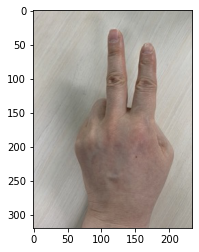

1/1 [==============================] - 0s 199ms/step
/content/rsp_image_1.jpg는 보입니다.


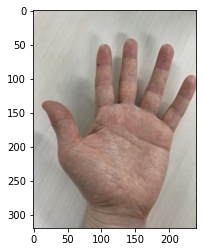

1/1 [==============================] - 0s 15ms/step
/content/rsp_image_2.jpg는 보입니다.


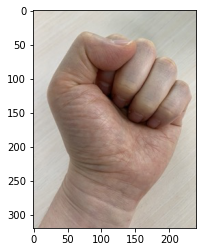

1/1 [==============================] - 0s 16ms/step
/content/rsp_image_3.jpg는 바위입니다.


In [ ]:
rsp_name = ['보', '바위', '가위']

for fn in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = tf.keras.utils.load_img(fn, target_size=(150, 150))
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    idx = np.argmax(classes[0])
    print(fn + "는 {}입니다.".format(rsp_name[idx]))

## 드롭아웃 규제

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, 
          validation_data=(test_images, test_labels),
          epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4859 - accuracy: 0.8243 - val_loss: 0.4027 - val_accuracy: 0.8536
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3641 - accuracy: 0.8660 - val_loss: 0.3841 - val_accuracy: 0.8577
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3302 - accuracy: 0.8766 - val_loss: 0.3656 - val_accuracy: 0.8702
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3055 - accuracy: 0.8862 - val_loss: 0.3601 - val_accuracy: 0.8723
Epoch 5/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2889 - accuracy: 0.8940 - val_loss: 0.3641 - val_accuracy: 0.8645
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.8971 - val_loss: 0.3414 - val_accuracy: 0.8773
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2612 - accuracy: 0.9009 - val_loss: 0.3677 - val_accuracy:

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, 
          validation_data=(test_images, test_labels),
          epochs=20)

model.evaluate(test_images, test_labels)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5933 - accuracy: 0.7873 - val_loss: 0.4620 - val_accuracy: 0.8308
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4321 - accuracy: 0.8454 - val_loss: 0.4163 - val_accuracy: 0.8443
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3971 - accuracy: 0.8580 - val_loss: 0.3926 - val_accuracy: 0.8576
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3749 - accuracy: 0.8654 - val_loss: 0.3749 - val_accuracy: 0.8607
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3556 - accuracy: 0.8711 - val_loss: 0.3618 - val_accuracy: 0.8730
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3412 - accuracy: 0.8759 - val_loss: 0.3576 - val_accuracy: 0.8754
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3328 - accuracy: 0.8798 - val_loss: 0.3405 - val_accuracy:

[0.3207298219203949, 0.8888000249862671]